Import Data

In [63]:
from tensorflow.keras.layers import Input , Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import numpy as np

In [64]:
train_path="/content/drive/MyDrive/fruit-classification-dataset"

In [65]:
x_train=[]

for folder in os.listdir(train_path):

    sub_path=train_path+"/"+folder

    for img in os.listdir(sub_path):

        image_path=sub_path+"/"+img

        img_arr=cv2.imread(image_path)

        img_arr=cv2.resize(img_arr,(224,224))

        x_train.append(img_arr)

In [66]:
train_x=np.array(x_train)

In [67]:
train_x=train_x/255.0

In [68]:
train_datagen = ImageDataGenerator(rescale = 1./255)

In [69]:
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'sparse')

Found 200 images belonging to 4 classes.


In [70]:
train_y=training_set.classes

In [71]:
training_set.class_indices

{'apple': 0, 'banana': 1, 'mango': 2, 'strawberry': 3}

In [72]:
train_x.shape

(201, 224, 224, 3)

In [73]:
index = 200
train_x = np.delete(train_x, index, axis=0)

In [74]:
train_x.shape

(200, 224, 224, 3)

In [75]:
train_y.shape

(200,)

In [76]:
train_y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3], dtype=int32)

In [77]:
vgg = InceptionV3(input_shape=(224,224,3), weights='imagenet', include_top=False)


In [78]:
#do not train the pre-trained layers of VGG-19
for layer in vgg.layers:
    layer.trainable = False

In [79]:
x = Flatten()(vgg.output)
#adding output layer.Softmax classifier is used as it is multi-class classification
prediction = Dense(4, activation='softmax')(x)

In [80]:
model = Model(inputs=vgg.input, outputs=prediction)

In [81]:
# view the structure of the model
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_94 (Conv2D)             (None, 111, 111, 32  864         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_94 (BatchN  (None, 111, 111, 32  96         ['conv2d_94[0][0]']              
 ormalization)                  )                                                           

In [82]:
model.compile(
  loss='sparse_categorical_crossentropy',
  optimizer="adam",
  metrics=['accuracy']
)

In [83]:
from sklearn.model_selection import train_test_split

In [84]:
xtrain,xtest , ytrain, ytest = train_test_split(train_x , train_y , test_size = 0.1 ,shuffle = True)

In [85]:
# fit the model
history = model.fit(
  xtrain,
  ytrain,
  validation_split=(0.1),
  epochs=10,
  batch_size=32,shuffle=True)

Epoch 1/10
6/6 [==============================] - 7s 470ms/step - loss: 5.2631 - accuracy: 0.5432 - val_loss: 13.2391 - val_accuracy: 0.6111
Epoch 2/10
6/6 [==============================] - 0s 79ms/step - loss: 2.7544 - accuracy: 0.8086 - val_loss: 2.2840 - val_accuracy: 0.9444
Epoch 3/10
6/6 [==============================] - 0s 72ms/step - loss: 1.4705 - accuracy: 0.8827 - val_loss: 7.0563 - val_accuracy: 0.6111
Epoch 4/10
6/6 [==============================] - 0s 76ms/step - loss: 0.9683 - accuracy: 0.9136 - val_loss: 4.1931 - val_accuracy: 0.7778
Epoch 5/10
6/6 [==============================] - 0s 72ms/step - loss: 0.0363 - accuracy: 0.9815 - val_loss: 5.7454 - val_accuracy: 0.8333
Epoch 6/10
6/6 [==============================] - 0s 72ms/step - loss: 0.2061 - accuracy: 0.9753 - val_loss: 6.8231 - val_accuracy: 0.7222
Epoch 7/10
6/6 [==============================] - 0s 76ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 7.8639 - val_accuracy: 0.7222
Epoch 8/10
6/6 [=========

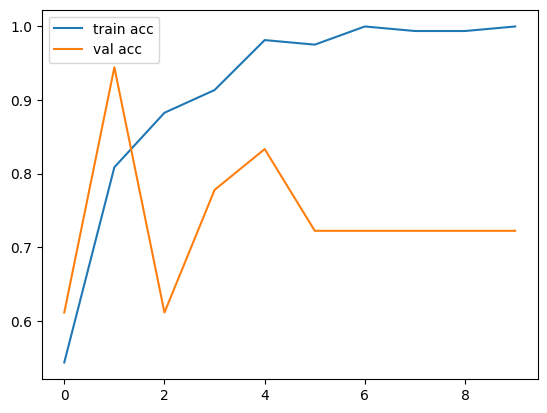

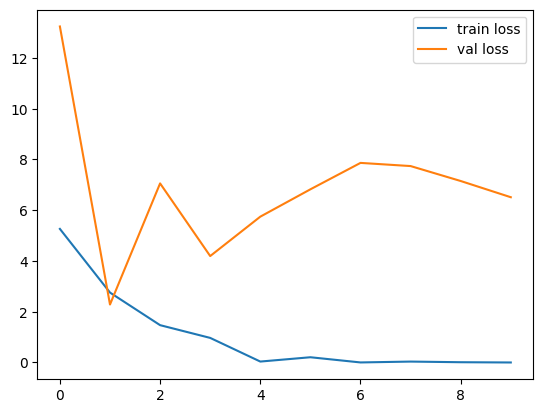

In [86]:
# accuracies

plt.plot(history.history['accuracy'], label='train acc')

plt.plot(history.history['val_accuracy'], label='val acc')

plt.legend()

plt.savefig('vgg-acc-rps-1.png')

plt.show()
# loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.savefig('vgg-loss-rps-1.png')
plt.show()

In [87]:
model.evaluate(xtest,ytest,batch_size=32)

1/1 [==============================] - 0s 67ms/step - loss: 1.8365 - accuracy: 0.9000


[1.8365329504013062, 0.8999999761581421]

In [88]:

#predict
y_pred=model.predict(xtest)
y_pred=np.argmax(y_pred,axis=1)
#get classification report
print(classification_report(y_pred,ytest))
#get confusion matrix
print(confusion_matrix(y_pred,ytest))

1/1 [==============================] - 1s 1s/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       0.71      1.00      0.83         5
           2       1.00      1.00      1.00         6
           3       1.00      0.67      0.80         6

    accuracy                           0.90        20
   macro avg       0.93      0.92      0.91        20
weighted avg       0.93      0.90      0.90        20

[[3 0 0 0]
 [0 5 0 0]
 [0 0 6 0]
 [0 2 0 4]]


In [89]:
cm = confusion_matrix(ytest,y_pred)

In [90]:
cm

array([[3, 0, 0, 0],
       [0, 5, 0, 2],
       [0, 0, 6, 0],
       [0, 0, 0, 4]])

Text(50.722222222222214, 0.5, 'Predictied Values')

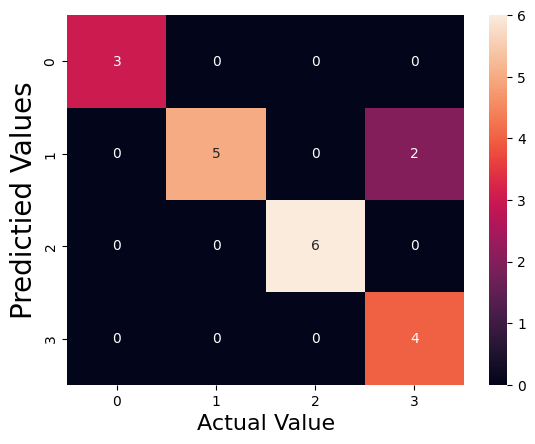

In [91]:
class_name = [0,1]

fig, ax = plt.subplots()
tick_marks = np.arange(len(class_name))
plt.xticks(tick_marks)
plt.yticks(tick_marks)
sns.heatmap(cm ,annot = True)
plt.xlabel('Actual Value',fontsize = 16)
plt.ylabel('Predictied Values',fontsize = 20)
